In [8]:
import numpy as np
import matplotlib.pyplot as plt
from useful_functions import *
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
def get_manifold(file, bin_size=400, return_lda=False, only_m1=False):
    file = file+ '.mat'
    data = get_clean_data(file, only_m1=only_m1)
    time_bins = data['t']
    new_bin_size = bin_size*10**-3  # s
    resample_factor = int(new_bin_size / np.mean(np.diff(time_bins)))
    r_spM = np.add.reduceat(data['spM'], np.arange(0, data['spM'].shape[1], resample_factor), axis=1)

    target_x = data['cursorM'][0].flatten()
    target_y = data['cursorM'][1].flatten()

    r_target_x = np.add.reduceat(target_x, np.arange(0, target_x.size, resample_factor),)/resample_factor
    r_target_y = np.add.reduceat(target_y, np.arange(0, target_y.size, resample_factor),)/resample_factor

    mx = np.mean(r_target_x)
    my = np.mean(r_target_y)
    r_target_x = r_target_x - mx
    r_target_y = r_target_y - my

    labels = np.zeros_like(r_target_x)
    for i in range(r_target_x.size):
        labels[i] = 0 if r_target_x[i] > 0 and r_target_y[i] > 0 else 1 if r_target_x[i] > 0 and r_target_y[i] < 0 else 2 if r_target_x[i] < 0 and r_target_y[i] < 0 else 3
        #labels[i] = 0 if r_target_x[i] > 0 else 1


    order = 2
    expanded_spM = expand_state_space(r_spM, order)
    print(r_spM.shape)
    lda = LinearDiscriminantAnalysis(n_components=3)
    X = lda.fit_transform(expanded_spM.T, labels)

    if return_lda:
        return X, labels, lda

    return X, labels

In [10]:
#indy_20160407_02_py
#loco_20170210_03_py
loco, loco_labels, lda = get_manifold('loco_20170210_03_py', return_lda=True, only_m1=True)
indy, indy_labels = get_manifold('indy_20160407_02_py', only_m1=True)

loco2, loco_labels2 = get_manifold('loco_20170215_02_py', only_m1=True)
indy2, indy_labels2 = get_manifold('indy_20160411_01_py', only_m1=True)

(151, 4421)


ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

(-5.0, 5.0)

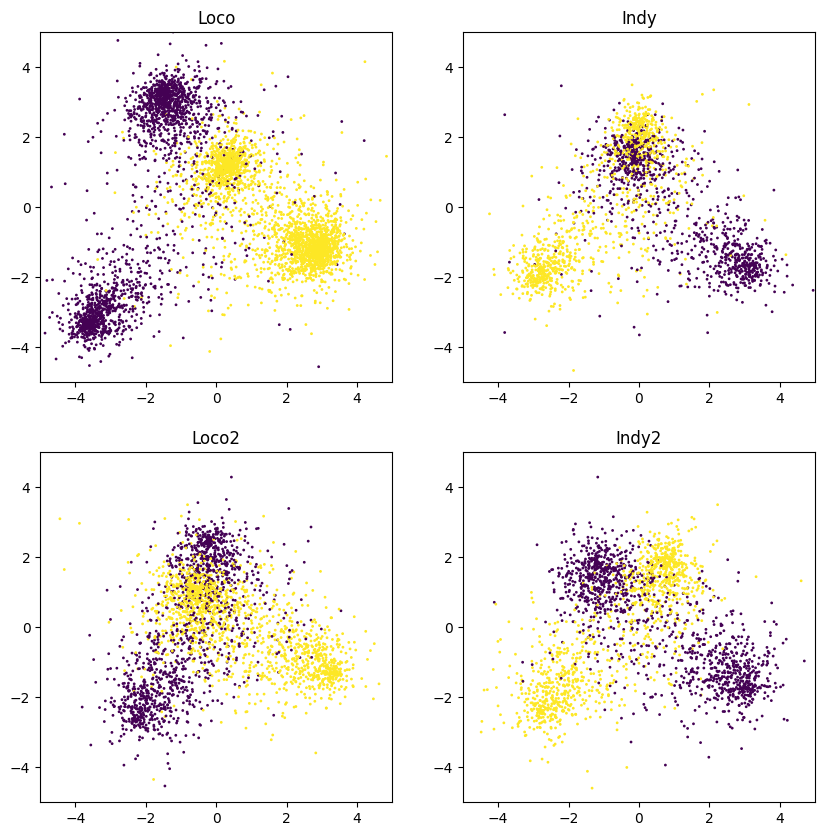

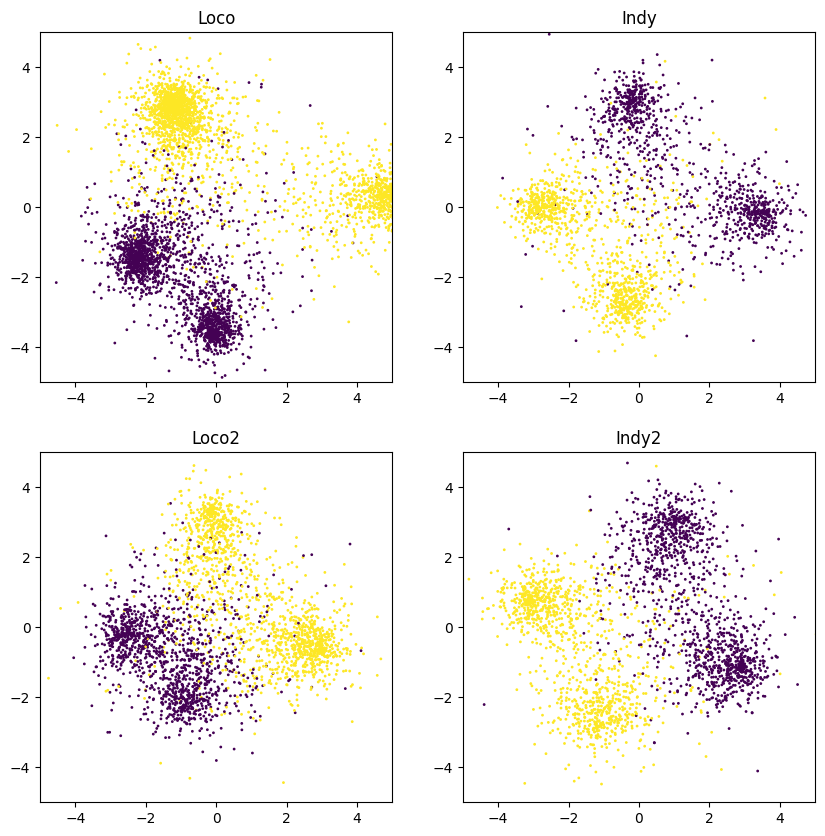

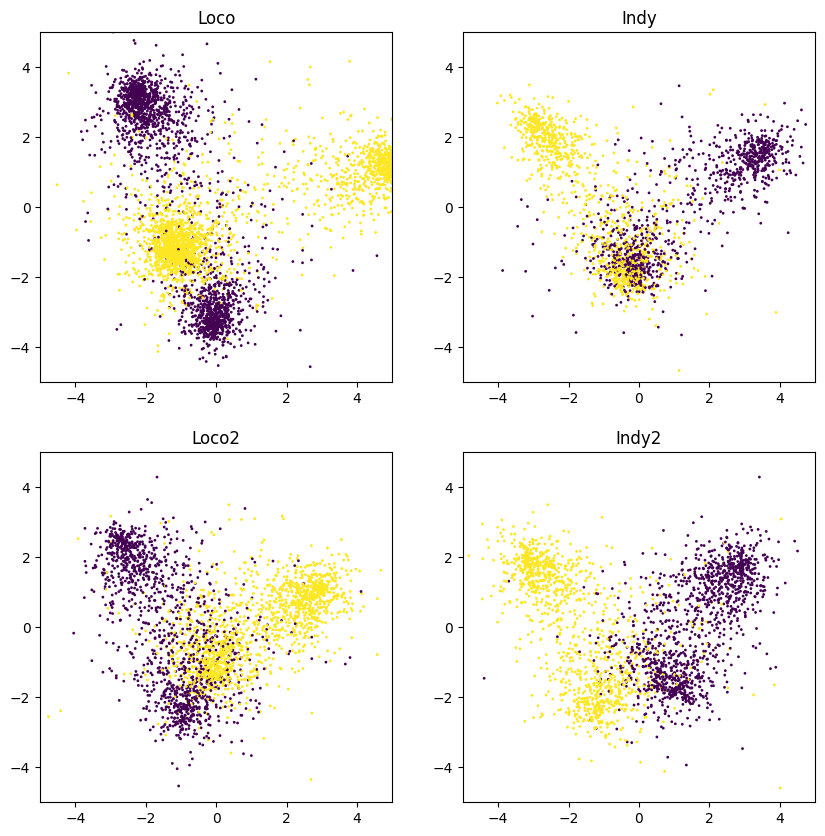

In [18]:
a,b= 1,2
s=1

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.scatter(loco[:, a], loco[:, b], c=loco_labels, cmap='viridis', s=s)
plt.title("Loco")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.subplot(2, 2, 2)
plt.scatter(indy[:, a], indy[:, b], c=indy_labels, cmap='viridis', s=s)
plt.title("Indy")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.subplot(2, 2, 3)
plt.scatter(loco2[:, a], loco2[:, b], c=loco_labels2, cmap='viridis', s=s)
plt.title("Loco2")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.subplot(2, 2, 4)
plt.scatter(indy2[:, a], indy2[:, b], c=indy_labels2, cmap='viridis', s=s)
plt.title("Indy2")
plt.xlim(-5, 5)
plt.ylim(-5, 5)

a,b= 0,1
s=1

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.scatter(loco[:, a], loco[:, b], c=loco_labels, cmap='viridis', s=s)
plt.title("Loco")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.subplot(2, 2, 2)
plt.scatter(indy[:, a], indy[:, b], c=indy_labels, cmap='viridis', s=s)
plt.title("Indy")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.subplot(2, 2, 3)
plt.scatter(loco2[:, a], loco2[:, b], c=loco_labels2, cmap='viridis', s=s)
plt.title("Loco2")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.subplot(2, 2, 4)
plt.scatter(indy2[:, a], indy2[:, b], c=indy_labels2, cmap='viridis', s=s)
plt.title("Indy2")
plt.xlim(-5, 5)
plt.ylim(-5, 5)

a,b= 0,2
s=1

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.scatter(loco[:, a], loco[:, b], c=loco_labels, cmap='viridis', s=s)
plt.title("Loco")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.subplot(2, 2, 2)
plt.scatter(indy[:, a], indy[:, b], c=indy_labels, cmap='viridis', s=s)
plt.title("Indy")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.subplot(2, 2, 3)
plt.scatter(loco2[:, a], loco2[:, b], c=loco_labels2, cmap='viridis', s=s)
plt.title("Loco2")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.subplot(2, 2, 4)
plt.scatter(indy2[:, a], indy2[:, b], c=indy_labels2, cmap='viridis', s=s)
plt.title("Indy2")
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [17]:
np.savetxt('loco.csv', loco, delimiter=',')
np.savetxt('indy.csv', indy, delimiter=',')
np.savetxt('loco2.csv', loco2, delimiter=',')
np.savetxt('indy2.csv', indy2, delimiter=',')

np.savetxt('loco_labels.csv', loco_labels, delimiter=',')
np.savetxt('indy_labels.csv', indy_labels, delimiter=',')
np.savetxt('loco_labels2.csv', loco_labels2, delimiter=',')
np.savetxt('indy_labels2.csv', indy_labels2, delimiter=',')

In [14]:
loco = np.loadtxt('loco.csv', delimiter=',')
indy = np.loadtxt('indy.csv', delimiter=',')
loco2 = np.loadtxt('loco2.csv', delimiter=',')
indy2 = np.loadtxt('indy2.csv', delimiter=',')
loco_labels = np.loadtxt('loco_labels.csv', delimiter=',') %3==0
indy_labels = np.loadtxt('indy_labels.csv', delimiter=',') %3==0
loco_labels2 = np.loadtxt('loco_labels2.csv', delimiter=',') %3==0
indy_labels2 = np.loadtxt('indy_labels2.csv', delimiter=',') %3==0


In [54]:
file = "loco_20170210_03_py"

file = file + '.mat'
data = loadmat(file)

In [31]:
file = "loco_20170210_03_py"

file = file+ '.mat'
data = loadmat(file)

#A. Get the instantaneous firing rate: from spike-times obtain an instantaneous firing rate (continuous time series)
#kick the unsorted spikes u1
sorted_spikes = data['spikes'][:,1:]
time_bins = data['t'].flatten()
spM = []
n_channels, n_units = sorted_spikes.shape
for channel in range(n_channels):
    for unit in range(n_units):
        spike_times = sorted_spikes[channel, unit].flatten()
        if len(spike_times) > 0:
            spM.append(np.histogram(spike_times, bins=time_bins)[0])

spM = np.array(spM)

# B. build an event matrix evM (PxT) of [0 1] marking the presence/absence of a certain stimulus
evM = spM > 0

# C. build a hand position matrix handM (3xT) with the coordinates of the hand
handM = data['finger_pos'].T

dict_data = {
            'spM': spM, 
            'evM': evM, 
            'handM': data['finger_pos'].T, 
            'cursorM': data['cursor_pos'].T,
            't': data['t'].flatten(),
            'targetM': data['target_pos'].T,
            } 

In [ ]:
bin_size = 400

time_bins = data['t']
new_bin_size = bin_size*10**-3  # s
resample_factor = int(new_bin_size / np.mean(np.diff(time_bins)))
r_spM = np.add.reduceat(data['spM'], np.arange(0, data['spM'].shape[1], resample_factor), axis=1)

target_x = data['targetM'][0].flatten()
target_y = data['targetM'][1].flatten()

r_target_x = np.add.reduceat(target_x, np.arange(0, target_x.size, resample_factor),)/resample_factor
r_target_y = np.add.reduceat(target_y, np.arange(0, target_y.size, resample_factor),)/resample_factor

mx = np.mean(r_target_x)
my = np.mean(r_target_y)
r_target_x = r_target_x - mx
r_target_y = r_target_y - my

labels = np.zeros_like(r_target_x)
for i in range(r_target_x.size):
    labels[i] = 0 if r_target_x[i] > 0 and r_target_y[i] > 0 else 1 if r_target_x[i] > 0 and r_target_y[i] < 0 else 2 if r_target_x[i] < 0 and r_target_y[i] < 0 else 3

In [ ]:
order = 2
expanded_spM = expand_state_space(r_spM, order)
lda = LinearDiscriminantAnalysis(n_components=3)
X = lda.fit_transform(expanded_spM.T, labels)

In [18]:
l = np.array([0, 1, 2, 3])
g=l.copy()
g[0] = 1
print(l,g)

[0 1 2 3] [1 1 2 3]


In [19]:
loco.shape, loco_labels.shape

((4421, 3), (4421,))

In [47]:
def circle_rep(data, labels, n=4):

    result = []
    labels=[]

    for i in range(n):
        group = data[labels==i]

        radius = np.std(group)
        center = np.mean(group, axis=0)

        theta = np.linspace(0, 2 * np.pi, 100)
        phi = np.linspace(0, np.pi, 100)
        theta, phi = np.meshgrid(theta, phi)

        x = radius * np.sin(phi) * np.cos(theta) + center[0]
        y = radius * np.sin(phi) * np.sin(theta) + center[1]
        z = radius * np.cos(phi) + center[2]
        


        result.append(np.array([x.flatten(),y.flatten(),z.flatten()]).T)
    
    #return np.array(result).reshape((-1,3))
    return result

mnf = circle_rep(loco, loco_labels)

print(mnf[0].shape)


    

ValueError: operands could not be broadcast together with shapes (100,100) (3,) 

In [69]:
def circle_rep(data, labels, n=4):

    means = []

    for i in range(n):
        group = data[labels==i]

        means.append(np.mean(group, axis=0))
    
    return np.array(means), np.arange(n)


mnf, labels = circle_rep(loco, loco_labels)
np.savetxt('mnf.csv', mnf, delimiter=',')
np.savetxt('labels.csv', labels, delimiter=',')

In [66]:
def circle_rep_with_std(data, labels, n=4):
    result = []
    out_labels=[]

    for i in range(n):
        group = data[labels==i]

        radius = np.std(group)
        center = np.mean(group, axis=0)

        theta = np.linspace(0, 2 * np.pi, 100)
        phi = np.linspace(0, np.pi, 100)
        theta, phi = np.meshgrid(theta, phi)

        x = radius * np.sin(phi) * np.cos(theta) + center[0]
        y = radius * np.sin(phi) * np.sin(theta) + center[1]
        z = radius * np.cos(phi) + center[2]

        out_labels.append(i*np.ones(100*100))

        result.append(np.array([x.flatten(),y.flatten(),z.flatten()]).T)
    
    return np.concatenate(result), np.concatenate(out_labels)

mnf, labels = circle_rep_with_std(loco2, loco_labels2)

print(mnf.shape, labels.shape)

np.savetxt('mnf.csv', mnf, delimiter=',')
np.savetxt('labels.csv', labels, delimiter=',')

(40000, 3) (40000,)


In [53]:
loco.shape, loco_labels.shape

((4421, 3), (4421,))

In [60]:
loco_labels

array([0., 0., 0., ..., 3., 0., 0.])